## Amath570 Final Project  2D PDE Solvers

In [1]:
%pylab inline
from scipy.integrate import ode
import numpy as np
import random
from tqdm import tqdm

pylab.rcParams['figure.figsize'] = (15, 15.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pymatbridge as pymat
ip = get_ipython()
pymat.load_ipython_extension(ip, matlab='/Applications/MATLAB_R2013a_Student.app/bin/matlab')

Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-6fa0b370-07f3-4500-bc55-9bd721b1c91f
Send 'exit' command to kill the server
......MATLAB started and connected!


/Users/kevm1892/anaconda/lib/python2.7/site-packages/IPython/nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


In [2]:
''' The analytical derivatives'''
def g(X,Xk,c):
    return sqrt((X[0]-Xk[0])**2+(X[1]-Xk[1])**2+c**2)

def gx(X,Xk,c):
    return (X[0]-Xk[0])/sqrt((X[0]-Xk[0])**2+(X[1]-Xk[1])**2+c**2)

def gy(X,Xk,c):
    return (X[1]-XK[1])/sqrt((X[0]-Xk[0])**2 +(X[1]-Xk[1])**2 + c**2)

def gxx(X,Xk,c):
    x = X[0]
    y = X[1]
    a = Xk[0]
    b = Xk[1]
    
    return (b**2-2*b*y+c**2+y**2)/(a**2-2*a*x + b**2 - 2*b*y + c**2 + x**2 +y**2)**(3/2)

def gyy(X,Xk,c):
    x = X[0]
    y = X[1]
    a = Xk[0]
    b = Xk[1]
    
    return (a**2-2*a*x+c**2+x**2)/(a**2-2*a*x + b**2 - 2*b*y + c**2 + x**2 +y**2)**(3/2)



In [30]:
h = lambda x,y:  (0.138889*x**2+(-0.54*x**4+0.72*x**3-0.368889*x**2+0.0859259*x-0.0184362)*cos(5.4*y)-0.0925926*x+0.0102881)/(x**2 - 0.666667*x+0.222222)**3
u_true = lambda x,y: (5/4 + cos(5.4*y))/(6+6*(3*x-1)**2)
#lap_true = [h(X[0],X[1]) for X in points]
#Utrue = [u_true(X[0],X[1]) for X in points]
#Utrue[1:135] =zeros(135+1)
#H = lambda x,y: 
H = lambda x,y:(tanh(9*(y-x)+1))/(tanh(9)+1)



In [4]:
from scipy.linalg import lu
from scipy.linalg import solve
def get_supporting_weights(Pnt,sup_points_t,C):
    N = len(sup_points_t)
    G = ones([N,N])
    Gxx = [gxx(Xk,Pnt,C) for Xk in sup_points_t]
    Gyy = [gyy(Xk,Pnt,C) for Xk in sup_points_t]
    for k,Pntk in enumerate(sup_points_t):
        G[k,:] = map(lambda Pntj:g(Pntk,Pntj,C),sup_points_t)
    # Solve for the weights
    # ex. G*Wx = Gx
    # 2nd x derivative
    (p,L,U) = lu(G)
    LU_solve = lambda L,U,b: solve(U,solve(L,b))
    Wxx = LU_solve(L,U,Gxx)
    Wyy = LU_solve(L,U,Gyy)
    return Wxx,Wyy

In [36]:
#Code for RBF 2-D Convergence Rates using precomputed points
import matplotlib.pyplot as plt
import scipy.interpolate
arr = linspace(0,1,100)
X,Y = meshgrid(arr,arr)
#mr = [0.02,0.04,0.08,1.2,1.6] # Used to look at different convergence rates 
dtrue = H(X.flatten(),Y.flatten())
errors = zeros(len(mr))
lenPoints = zeros(len(mr))
i = 1


    # get initial points for boundaries
    # orthogonal boundaries
    minRange = 0.03
    xx = arange(0,1+minRange,minRange)

    # since its a square we have the four sides to arange
    lb = [(x,y) for x,y in zip(zeros(len(xx)),xx)] 
    rb = [(x,y) for x,y in zip(ones(len(xx)),xx)] 
    tb = [(x,y) for x,y in zip(xx,ones(len(xx)))] 
    bb = [(x,y) for x,y in zip(xx,zeros(len(xx)))]

    initial_bcs = lb+rb+tb+bb

    keep_pnts = list(set(initial_bcs))
    #keep_pnts = initial_bcs


    keep_pnts = asarray(keep_pnts)
    pnts_inrange = [keep_pnts[:,0] <= 1, keep_pnts[:,1]<=1 ,keep_pnts[:,0]>=0 ,keep_pnts[:,1]>=0]
    keep_pnts = keep_pnts[reduce(logical_and,pnts_inrange)]

    n = 50000
    keep_pnts = keep_pnts.tolist()
    points = np.random.random_sample((n, 2))
    for k in tqdm(range(n)):
        pnt = points[k]
        min_dist = min(map(lambda p:sqrt((pnt[1]-p[1])**2+(pnt[0]-p[0])**2),keep_pnts))
        if min_dist > minRange:
            keep_pnts.append(pnt)

    points = asarray(keep_pnts)

    vals = [H(x,y) for x,y in zip(points[:,0],points[:,1])] 
    rbfi = scipy.interpolate.Rbf(points[:,0], points[:,1], vals)
    del vals
    di = rbfi(X,Y)
    errors[i] = np.max(np.abs(di.flatten()-dtrue))
    lenPoints[i] = len(points)



    
    

In [8]:
# Boundary Condtions indices
BCs = len(keep_pnts)
print BCs

135


In [9]:
n = 50000
keep_pnts = keep_pnts.tolist()
points = np.random.random_sample((n, 2))
for k in tqdm(range(n)):
    pnt = points[k]
    min_dist = min(map(lambda p:sqrt((pnt[1]-p[1])**2+(pnt[0]-p[0])**2),keep_pnts))
    if min_dist > minRange:
        keep_pnts.append(pnt)
        

In [200]:
## Used for testing interpolantss
# NN = 50
# arr = linspace(0,1,NN)
# Xp,Yp = meshgrid(arr,arr)
# keep_pnts = asarray([Xp.flatten(),Yp.flatten()]).T

In [16]:
points = asarray(keep_pnts)
num_sk = 16 # The number of supporting knots
num_pts = len(keep_pnts)
print "Number of Points: {}".format(num_pts)
Weights = []  # Collects all weights needed for the time-stepping
Inds = []
for i in tqdm(range(num_pts)):
    Pnt = points[i]
    inds = argsort(map(lambda p:sqrt((Pnt[1]-p[1])**2+(Pnt[0]-p[0])**2),points))[:num_sk]
    sup_points = points[inds]
    Wxxi,Wyyi = get_supporting_weights(Pnt,sup_points,c=0.002)
    Weights.append((Wxxi,Wyyi))
    Inds.append(inds)

Weights = asarray(Weights)
Inds = asarray(Inds)
Inds += 1 # needed for matlab indexing

Number of Points: 800


In [419]:
# u0 for time step
u0 = exp(-(points[:,0]-.05)**2/.1-(points[:,1]-.05)**2/.1);   


In [19]:
# Interpolate
import matplotlib.pyplot as plt
import scipy.interpolate
def plot2d(Z,Plot=True,vRange=None):
    ''' A helpful plotting function for the points'''
    
    if vRange == None:
        Vmin = min(Z)
        Vmax = max(Z)
    else:
        Vmin = vRange[0]
        Vmax = vRange[1]
  
    #w0 = exp(-(points[:,0]-.5)**2/.05-(points[:,1]-.5)**2/.05);
    x = asarray(points[:,0])
    y = asarray(points[:,1])
    z = asarray(Z)
    # Set up a regular grid of interpolation points
    xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate
    rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
    zi = rbf(xi, yi)

    img = plt.imshow(zi, vmin=Vmin, vmax=Vmax, origin='lower',
               extent=[x.min(), x.max(), y.min(), y.max()])
    if Plot == True:
        plt.scatter(x, y, c=z)
        plt.colorbar()

        plt.show()
    else:
        pass
    
    return img

In [423]:
# Code for running the matlab pde without time stpeping
%%matlab -i Weights,Inds,points,Utrue -o lap_num
k =1
t = 1
lap_num = rhs_pde_MQ2(t,Utrue,Weights,Inds,k)';


k =

     1


t =

     1



## Plots for testing laplacian

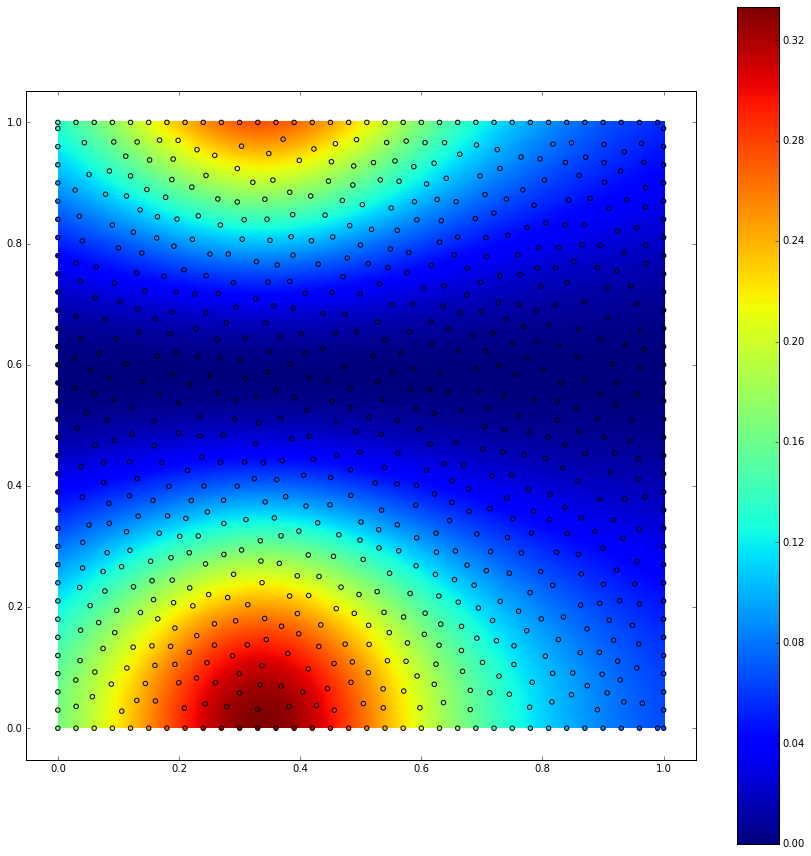

In [424]:
plot2d(Utrue)

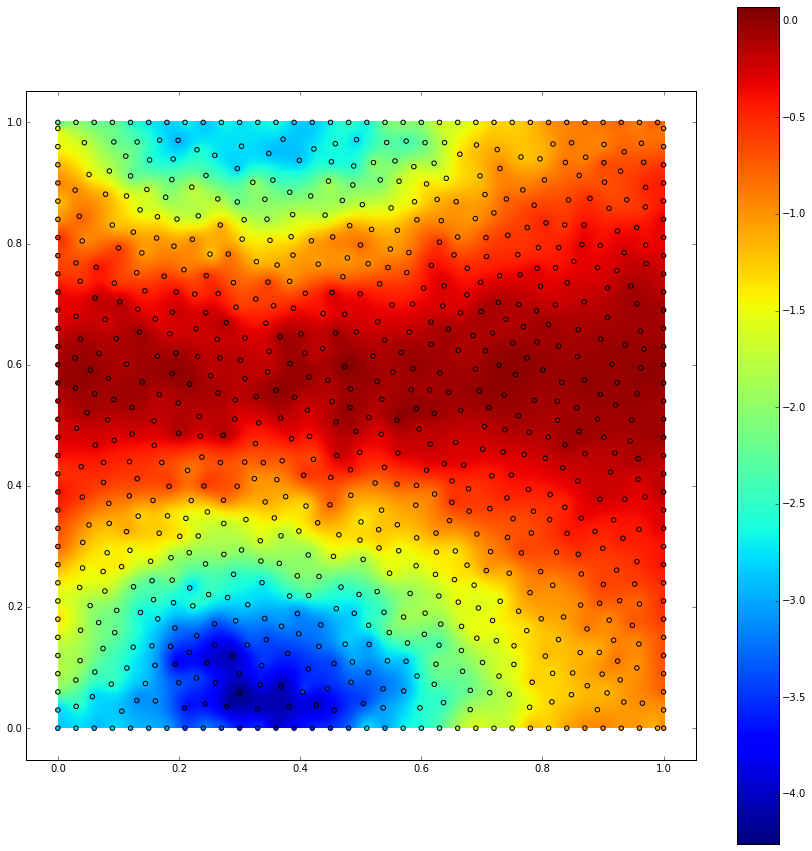

In [425]:
plot2d(lap_num)

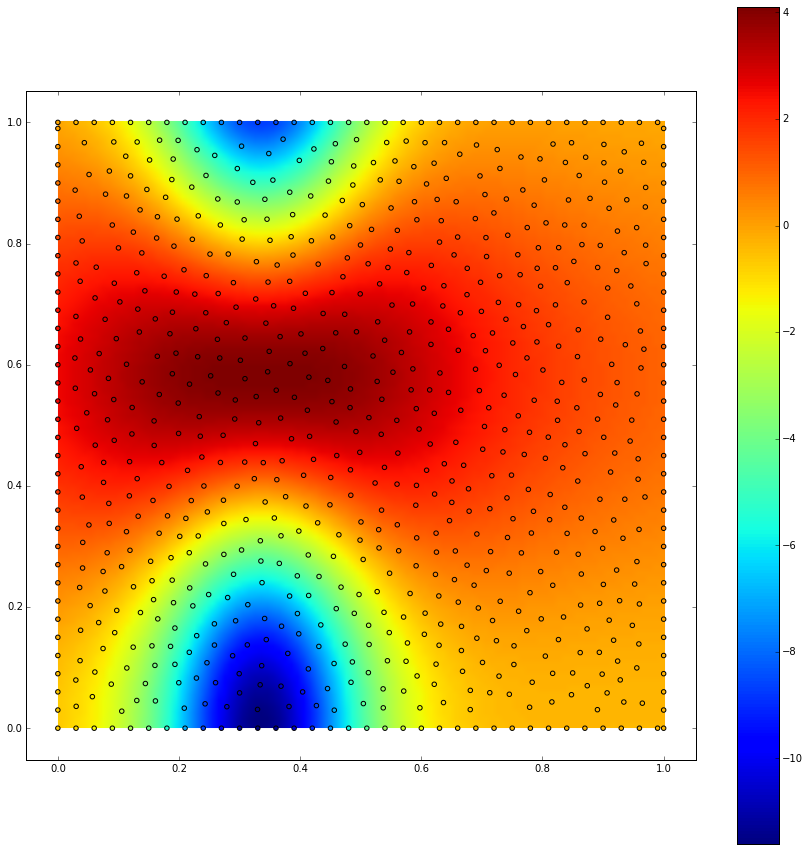

In [237]:
plot2d(lap_true)

In [446]:
BCs = 136

In [1]:
%%matlab -i Weights,Inds,Utrue,points,BCs -o u
tt = [0:0.01:.5];
k = .8;
N = length(Inds);
[t,u] = ode45(@(t,u) rhs_pde_MQ2(t,u,Weights,Inds,k)',tt,Utrue);
              
%plot 
gcf = figure;
axis('vis3d')
%set(gca,'zlim',[0,1]) 
for j=1:length(t)
    %w2 = A*w(j,:)';
    
    %w_ = reshape(u(j,:),n,n);
    F = scatteredInterpolant(points(:,1),points(:,2),u(j,:)');
    ti = 0:.05:1;
    [xq,yq] = meshgrid(ti,ti);
    vq = F(xq,yq);
    %surf(xq,yq,vq);
    pcolor(xq,yq,vq);
    %zlim(gca,[-5 5])
    shading interp
    mov(j) = getframe(gcf)
    drawnow
    pause(.1)
end
movie2avi(mov,'movie_fin4.avi');



ERROR: Cell magic `%%matlab` not found.


In [118]:
# Code for animations

import matplotlib.animation as animation
fig = plt.figure()
imgs = [[plot2d(frame,Plot=False)] for frame in u] 
ani = animation.ArtistAnimation(fig, imgs, interval=10, blit=False, repeat_delay=0)
ani.save('Solution2.gif', writer="imagemagick")


array([ 0.99615097])

## Plot for Grids

In [2]:
points = keep_pnts
num_sk = 16 # the number of supporting knots
num_pts = len(keep_pnts)
print "Number of Points: {}".format(num_pts)
#points = array([(random.uniform(0,1),random.uniform(0,1)) for i in range(num_pts)])
i = round(num_pts * random.random())
Pnt = points[i]
points_mod = points[list(set(range(num_pts)).difference(set([i])))]
inds = argsort(map(lambda p:sqrt((Pnt[1]-p[1])**2+(Pnt[0]-p[0])**2),points_mod,))[:num_sk]
#vals = sort(map(lambda p:sqrt((Pnt[1]-p[1])**2+(Pnt[0]-p[0])**2),points,))[:num_sk]

sup_points = points_mod[inds]
plot(sup_points[:,0],sup_points[:,1],'r*')
pylab.ylim([0,1])
pylab.xlim([0,1])

not_inds = set(range(len(points_mod))) - set(inds)
not_sup_points = points_mod[asarray(tuple(not_inds))]
plot(not_sup_points[:,0],not_sup_points[:,1],'*')
plot(Pnt[0],Pnt[1],'*g')

max_pt = points[inds[-1]]
D = 2*sqrt((Pnt[1]-max_pt[1])**2+(Pnt[0]-max_pt[0])**2) # minimal diameter 
print D



NameError: name 'keep_pnts' is not defined